### Importing Libraries

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

### Load the dataset

In [51]:
data = pd.read_csv("hr_salary_data.csv")

### Feature Engineering

In [52]:
features = ["Age", "Years_of_Experience"]

X = data[features]
y = data["Target_Salary"]

### Train-test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the models

In [54]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train the model
linear_model.fit(X, y)

# Predict without using "Current Salary"
input_data = pd.DataFrame([[25, 5]], columns=["Age", "Years_of_Experience"])
prediction = linear_model.predict(input_data)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
prediction = ridge_model.predict(input_data)

### Evaluate Models

In [55]:
## Evaluate Models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2, predictions

# Linear Regression Metrics
mse_lr, mae_lr, r2_lr, preds_lr = evaluate_model(linear_model, X_test, y_test)
print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R2: {r2_lr}")

# Random Forest Metrics
mse_rf, mae_rf, r2_rf, preds_rf = evaluate_model(random_forest_model, X_test, y_test)
print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}")

Linear Regression - MSE: 24990754.04946001, MAE: 3975.5181655394294, R2: 0.5803292653618901
Random Forest - MSE: 25263988.718084224, MAE: 3997.3663925332785, R2: 0.5757408246176381


### Plotting for Linear Regression

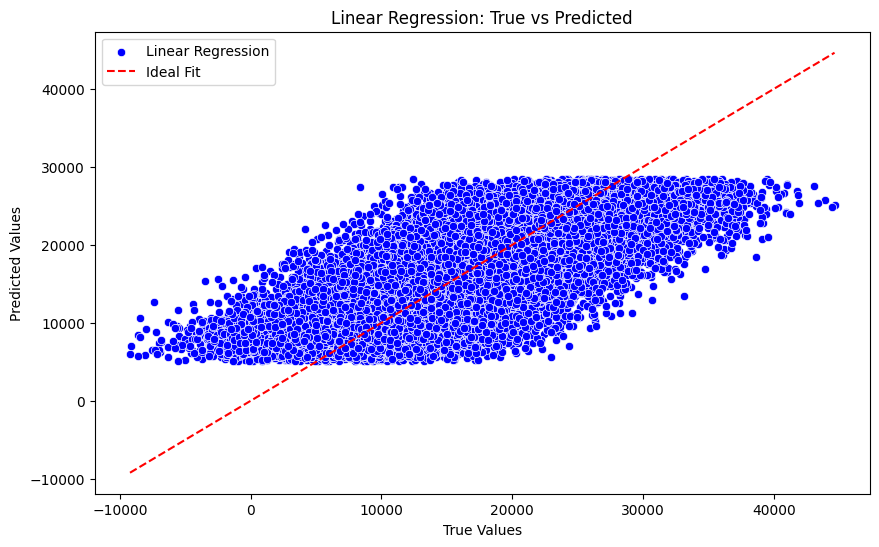

In [56]:
# Comparison of True vs Predicted for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds_lr, label="Linear Regression", color="blue")
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="--", label="Ideal Fit")
plt.title("Linear Regression: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

### Plotting for Random Forest 

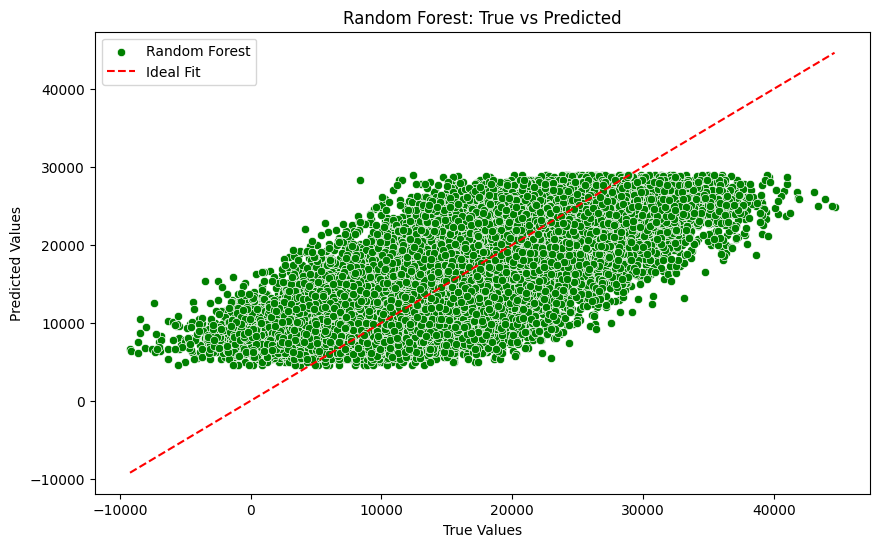

In [57]:
# Comparison of True vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds_rf, label="Random Forest", color="green")
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="--", label="Ideal Fit")
plt.title("Random Forest: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

### Save the better model 

In [58]:
## Save the better model
if r2_rf > r2_lr:
    joblib.dump(random_forest_model, "salary_predictor_model.pkl")
    print("Random Forest model saved as salary_predictor_model.pkl!")
else:
    joblib.dump(linear_model, "salary_predictor_model.pkl")
    print("Linear Regression model saved as salary_predictor_model.pkl!")

Linear Regression model saved as salary_predictor_model.pkl!
